<a href="https://colab.research.google.com/github/adammoss/MLiS2/blob/master/workshops/workshop1/question2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the solution to question 2 of workshop 1. The changes required to the example in lectures are (1) implement a sigmoid function and use this on the output layer (2) modify $\Delta_2^{(1)}$ to use the BCE loss and a sigmoid activation function. This is $\Delta_2= \frac{1}{4} \left( \hat{\mathbf{Y}} - \mathbf{Y} \right)$

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
np.random.seed(0)

In [3]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
print(X)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]


In [4]:
Y = np.array([[0], [1], [1], [0]])
print(Y)

[[0]
 [1]
 [1]
 [0]]


Define sigmoid function

In [0]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

Define the MLP model

In [0]:
class MLP(object):

  def __init__(self):
    # Initialise with random weights
    self.weights_1 = 0.1 * np.random.normal(size=(3,2))
    self.weights_2 = 0.1 * np.random.normal(size=(3,1))

  def forward(self, x):
    # Do a forward pass
    if len(x.shape) == 1:
      # Single example, so add a batch dimension of 1
      x = np.expand_dims(x, axis=0)
    # Hidden layer 
    z_1 = np.matmul(np.hstack((np.ones(shape=(x.shape[0], 1)), x)), self.weights_1)
    # Apply ReLU activation function
    a_1 = np.maximum(z_1, 0)
    # Output layer
    z_2 = np.matmul(np.hstack((np.ones(shape=(a_1.shape[0], 1)), a_1)), self.weights_2)
    # Simoid function activation 
    a_2 = sigmoid(z_2)
    return z_1, a_1, z_2, a_2

In [0]:
num_epochs = 20000
learning_rate = 0.1

Update random initial weights and biases by back-prop

In [8]:
m = MLP()
loss_history = []
weights_1_history = []
weights_2_history = []
for epoch in range(num_epochs):
  # Do forward pass
  z_1, a_1, z_2, a_2 = m.forward(X)
  # Loss is now BCE loss
  loss = 0.25 * np.sum(-(Y * np.log(a_2) + (1 - Y)*np.log(1 - a_2)))
  loss_history.append(loss)
  if epoch % 1000 == 0:
    print(epoch, loss)
  # Delta_2 has shape(4, 1), the first dimension being the batch dimension - this is modified due to the BCE loss
  delta_2 =  0.25 * (a_2 - Y)
  g_prime_1 = np.heaviside(z_1, 0)
  # Delta_1 has shape (4, 2)
  delta_1 = np.matmul(delta_2, m.weights_2[1:3, :].T) * g_prime_1
  # Biases of layers connecting input and hidden layers
  m.weights_1[0, :] -= learning_rate * np.sum(delta_1[:, :], axis=0)
  # Weights of layers connecting input and hidden layers 
  m.weights_1[1:3, :] -= learning_rate * np.matmul(X.T, delta_1)
  # Biases of layers connecting hidden and output layers
  m.weights_2[0, :] -= learning_rate * np.sum(delta_2[:, :], axis=0)
  # Weights of layers connecting hidden and output layers
  m.weights_2[1:3, :] -= learning_rate * np.matmul(a_1.T, delta_2)
  weights_1_history.append(np.copy(m.weights_1))
  weights_2_history.append(np.copy(m.weights_2))
loss_history = np.array(loss_history)
weights_1_history = np.array(weights_1_history)
weights_2_history = np.array(weights_2_history)

0 0.694211312919729
1000 0.16581199992608048
2000 0.023674298543242912
3000 0.011171295982806025
4000 0.007120236927186968
5000 0.005164226953902477
6000 0.004025214545896997
7000 0.0032861579356238922
8000 0.002769790283162306
9000 0.002390493291346357
10000 0.0020988387894559746
11000 0.0018697836131505343
12000 0.0016839469356218781
13000 0.0015305708345009217
14000 0.001402491288890796
15000 0.0012935340763333887
16000 0.0012001456398767502
17000 0.0011187279672248706
18000 0.0010474062249058447
19000 0.0009843529494426957


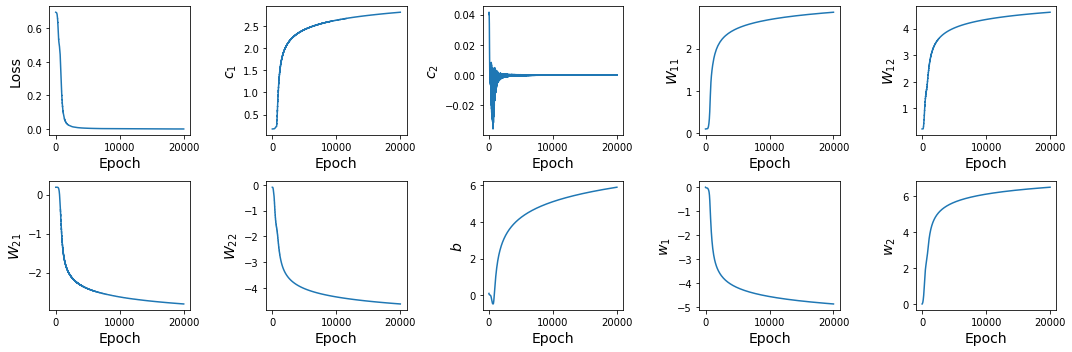

In [9]:
plt.figure(figsize=(15, 5))
ax = plt.subplot(2, 5, 1)
ax.plot(loss_history[:])
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Loss', fontsize=14)
ax = plt.subplot(2, 5, 2)
ax.plot(weights_1_history[:,0,0])
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('$c_1$', fontsize=14)
ax = plt.subplot(2, 5, 3)
ax.plot(weights_1_history[:,0,1])
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('$c_2$', fontsize=14)
ax = plt.subplot(2, 5, 4)
ax.plot(weights_1_history[:,1,0])
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('$W_{11}$', fontsize=14)
ax = plt.subplot(2, 5, 5)
ax.plot(weights_1_history[:,1,1])
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('$W_{12}$', fontsize=14)
ax = plt.subplot(2, 5, 6)
ax.plot(weights_1_history[:,2,0])
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('$W_{21}$', fontsize=14)
ax = plt.subplot(2, 5, 7)
ax.plot(weights_1_history[:,2,1])
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('$W_{22}$', fontsize=14)
ax = plt.subplot(2, 5, 8)
ax.plot(weights_2_history[:,0,0])
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('$b$', fontsize=14)
ax = plt.subplot(2, 5, 9)
ax.plot(weights_2_history[:,1,0])
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('$w_1$', fontsize=14)
ax = plt.subplot(2, 5, 10)
ax.plot(weights_2_history[:,2,0])
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('$w_2$', fontsize=14)
plt.tight_layout()
plt.show()

In [10]:
print(m.weights_1)

[[ 2.80439969e+00  8.66239557e-06]
 [ 2.86059984e+00  4.61778282e+00]
 [-2.80445550e+00 -4.61775196e+00]]


In [11]:
print(m.weights_2)

[[ 5.89955693]
 [-4.87157508]
 [ 6.51583518]]


In [12]:
z_1, a_1, z_2, a_2 = m.forward(X)
print(a_2)

[[4.25325554e-04]
 [9.97266832e-01]
 [9.99773118e-01]
 [3.23644693e-04]]
